## **Esercizio "Count Substring Occurrences"**

### This function should take a main string and a substring as inputs and return the number of occurrences of the substring within the main string. It should not be case-sensitive and may overlap.

https://py.checkio.org/mission/count-substring-occurrences/

Conteggio delle occorrenze di una stringa in una stringa di riferimento.


- Esempio ("hello world hello", "hello") == 2)
- Nessuna distinzione maiuscole-minuscole (Es. ("HELLO", "hello") == 1)
- Sovrapposizioni consentite. (Es. 'abababa','aba' == 3)

  
  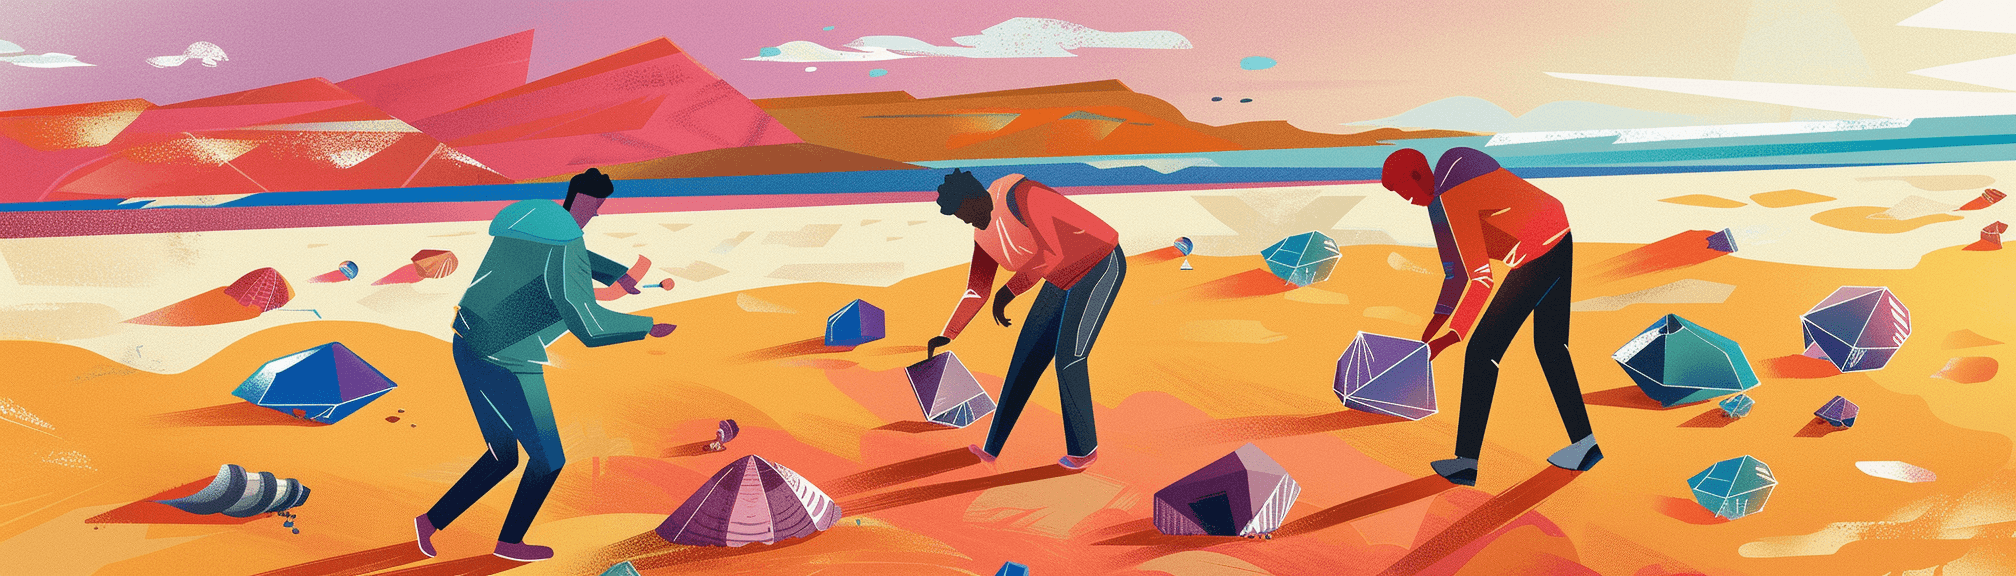

### Soluzione 1
(proposta da me)

#### *Concetti analizzati:* 
- funzione lower()
- ciclo while
- costrutto if
- la keyword assert

In [4]:
def count_occurrences(main_str: str, sub_str: str) -> int:
    '''
    Questo algoritmo converte le due stringhe in minuscolo.
    Poi attraverso un ciclo while sulla lunghezza della stringa principale, cerca la sub_str a partire dall'indice i
    Se lo trova (find != -1), registra il valore di quell'indice e se è diverso dal precedente (per evitare la duplicazione nel conteggio)
    Incrementa il contatore delle occorrenze.
    
    '''
    # Inizializza il contatore delle occorrennze
    counter = 0
    # Inizializza l'indice di scorrimento
    i = 0
    # Inizializza l'indice di riferimento
    indice_vecchio = -1
    # Conversione in minuscolo
    main_str = main_str.lower()
    sub_str = sub_str.lower()
    while i < len(main_str):
        # Ricerca della sub_str nella main_str, a partire dall'indice i
        if main_str.find(sub_str, i) != -1:  # Find restituisce -1 qualora il valore non viene trovato
            indice_trovato = main_str.find(sub_str, i)
            # Nel caso in cui l'indice trovato è diverso dal precedente, viene aggiornato l'indice precedente e il contatore
            # L'utilizzo dell'indice vecchio risolve questi problemi:
            # Confrontando l'indice trovato con l'indice vecchio, il codice evita di contare due volte le occorrenze consecutive.
            if indice_trovato != indice_vecchio:
                counter += 1    # counter = counter +1
                indice_vecchio = indice_trovato  # aggiornare il valore dell'indice vecchio
        i += 1  # Senza questa istruzione, il ciclo while proseguirebbe all'infinito
    return counter



# -------------- Test area ------------------------

# VERIFICA DEI RISULTATI CON ASSERT

# A cosa serve la keyword  *** assert *** 
# L'istruzione assert in Python è uno strumento di debug che permette di verificare le assunzioni sul codice. 
# In parole semplici, ci permette di controllare se una certa condizione è vera o falsa, e in caso contrario, generare un'eccezione.


print(count_occurrences("hello hello hello", "hello"))
assert count_occurrences("hello world hello", "hello") == 2
assert count_occurrences("Hello World hello", "hello") == 2
assert count_occurrences("hello", "world") == 0
assert count_occurrences("hello world hello world hello", "world") == 2
assert count_occurrences("HELLO", "hello") == 1
assert count_occurrences("appleappleapple", "appleapple") == 2
assert count_occurrences("HELLO WORLD", "WORLD") == 1
assert count_occurrences("hello world hello", "o w") == 1
assert count_occurrences("apple apple apple", "apple") == 3
assert count_occurrences("apple Apple apple", "apple") == 3
assert count_occurrences("apple", "APPLE") == 1
#assert count_occurrences("apple", "APPLE") == 2 # assert errato - da eliminare dopo la dimostrazione - 





3


### Soluzione 2

(proposta da me)

#### *Concetti analizzati:* 
- dizionari
- ciclo for
- funzione sorted
- list comprehension

In [7]:
def count_occurrences(main_str: str, sub_str: str) -> int:
    '''
    Questo algoritmo usa un dizionario, con:
    chiave: indice della sub_str trovata nella main_str
    valore: sub_str

    '''
    # Inizializza il dizionario
    counter_dict = {}   # counter_dict = dict()
    main_str = main_str.lower()
    sub_str = sub_str.lower()
    for i in range(len(main_str)):
        # Cerca la prima occorrenza di sub_str a partire dall'indice i usando main_str.find(sub_str, i).
        # Aggiunge l'indice trovato come chiave nel dizionario e associa la sottostringa sub_str come valore.
        counter_dict[main_str.find(sub_str, i)] = sub_str # nome_dizionario[chiave] = valore

    # Restituisce la lunghezza del dizionario counter_dict, 
    # che rappresenta il numero di indici memorizzati (ovvero il numero di occorrenze di sub_str).
    
    return len([x for x in sorted(counter_dict) if x > -1])
    # for x in sorted(counter_dict):
    #     if x > -1:
    #        lista1.append(x)



# -------------- Test area ------------------------


assert count_occurrences("hello world hello", "hello") == 2
assert count_occurrences("Hello World hello", "hello") == 2
assert count_occurrences("hello", "world") == 0
assert count_occurrences("hello world hello world hello", "world") == 2
assert count_occurrences("HELLO", "hello") == 1
assert count_occurrences("appleappleapple", "appleapple") == 2
assert count_occurrences("HELLO WORLD", "WORLD") == 1
assert count_occurrences("hello world hello", "o w") == 1
assert count_occurrences("apple apple apple", "apple") == 3
assert count_occurrences("apple Apple apple", "apple") == 3
assert count_occurrences("apple", "APPLE") == 1




## Migliore soluzione - la più votata su checkio.org
autore: freeman_lex


#### *Concetti analizzati:* 

- regex, (modulo re)
- f-string
- row string

In [8]:
import re  # Importazione modulo delle espressioni regolari

def count_occurrences(main_str: str, sub_str: str) -> int:
    
    matches = re.findall(fr'(?={sub_str})', main_str, flags=re.IGNORECASE)
    # f-string viene rappresentata con l'uso della f ->  print(f'questa è una variabile = {valore_della_variabile}')
    # raw string viene rappresentata con l'uso della r -> print(r'c:\prova.txt')
    return len(matches)

    '''
    STRUMENTI DI CODICE UTILIZZATI

    - findall è una funzione del modulo re che restituisce una lista
        è utilizzata per trovare tutte le occorrenze di un pattern specificato in una stringa.
    
    - I due caratteri ?= in una regex formano un'asserzione di lookahead positivo.
        significa che corrisponde a una posizione seguita dall'espressione regolare contenuta tra (?= e ).

    - Le f-string (formatted string) sono un modo per incorporare espressioni direttamente all'interno delle stringhe. 
        Introdotte in Python 3.6.

    - Le raw string (r) mantengono i backslash dei caratteri escape.
        Nelle stringhe normali, i backslash (\) vengono utilizzati per "escape" di caratteri (ad esempio, \n per una nuova riga). 
        Le stringhe raw trattano i backslash in modo letterale ed è possibile includere caratteri speciali senza escape involontari.
        Esempio d'uso: percorsi di files e directories. (C:\prova.txt) c:\\prova.txt
        \\ => \
    ''' 
    
    
# -------------- Test area ------------------------

# VERIFICA DEI RISULTATI CON ASSERT

assert count_occurrences("hello world hello", "hello") == 2
assert count_occurrences("Hello World hello", "hello") == 2
assert count_occurrences("hello", "world") == 0
assert count_occurrences("hello world hello world hello", "world") == 2
assert count_occurrences("HELLO", "hello") == 1
assert count_occurrences("appleappleapple", "appleapple") == 2
assert count_occurrences("HELLO WORLD", "WORLD") == 1
assert count_occurrences("hello world hello", "o w") == 1
assert count_occurrences("apple apple apple", "apple") == 3
assert count_occurrences("apple Apple apple", "apple") == 3
assert count_occurrences("apple", "APPLE") == 1
